In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import requests
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/ISAACABREHAM/Downloads/ssense_dataset.csv')

In [3]:
df # Here is all our data in the dataset

,brand,description,price_usd,type
0,Rick Owens,Black Moncler Edition Down Coat,2585,mens
1,Rick Owens,Black Moncler Edition Cyclopic Down Coat,2405,mens
2,Rick Owens,Black Moncler Edition Cyclopic Down Jacket,3160,mens
3,Rick Owens,Taupe & Green Moncler Edition Down Coat,3505,mens
4,Rick Owens,Taupe & Green Moncler Edition Cyclopic Down Ja...,2885,mens
...,...,...,...,...
19914,by Malene Birger,Black Micella Boots,497,womens
19915,See by Chloé,Black July Boots,331,womens
19916,OPEN YY,Black Treaded Shearling Boots,426,womens
19917,OPEN YY,Beige Treaded Shearling Boots,433,womens


In [4]:
# HERE WE SEE SSENSE CARRIES 631 DIFFERENT BRANDS ALL LISTED BELOW

different_brands = df['brand'].unique()
print("different_brands:")
for brand in different_brands:
    print(brand)
    
num_unique_brands = len(different_brands)
print("\nNumber of Unique Brands:", num_unique_brands)

different_brands:
Rick Owens
Justine Clenquet
Burberry
We11done
ZEGNA
Versace Jeans Couture
NEEDLES
SOPHNET.
Uniform Bridge
ACRONYM®
Helmut Lang
Nike
N.Hoolywood
Soar Running
ICECREAM
Isabel Marant
A.P.C.
Sporty & Rich
Valentino Garavani
BAPE
Sky High Farm Workwear
Anna Sui
ERL
Moon Boot
ROA
11 by Boris Bidjan Saberi
KANGHYUK
Miharayasuhiro
Ferragamo
Versace Underwear
Vivienne Westwood
Palm Angels
VAQUERA
Marni
RETROSUPERFUTURE
Garrett Leight
BONNIE CLYDE
Fear of God
Paul Smith
Comme des Garçons Homme
Rhude
TAKAHIROMIYASHITA TheSoloist.
Neighborhood
AMI Paris
CMMN SWDN
Maison Kitsuné
Canada Goose
Fred Perry
Billionaire Boys Club
South2 West8
MACKAGE
Salomon
rag & bone
Le Gramme
Jil Sander
Bode
Junya Watanabe
Comme des Garçons Homme Plus
Givenchy
Pilgrim Surf + Supply
Studio Nicholson
Marine Serre
Casablanca
COMMAS
Han Kjobenhavn
Lanvin
Nike Jordan
adidas x Humanrace by Pharrell Williams
Gucci
Bottega Veneta
Carhartt Work In Progress
Comme des Garçons Homme Deux
Collina Strada
ATON
Char

Top  Brands By Inventory:
Gucci                        481
Nike                         299
Bottega Veneta               296
Rick Owens                   258
Marni                        250
A.P.C.                       249
AMI Paris                    244
Isabel Marant                240
rag & bone                   215
Marc Jacobs                  196
Givenchy                     195
The Row                      186
Jil Sander                   182
Dime                         177
Balenciaga                   175
Valentino Garavani           168
Burberry                     167
MM6 Maison Margiela          161
NORSE PROJECTS               152
nanamica                     137
HOMME PLISSÉ ISSEY MIYAKE    129
Bode                         128
GANNI                        127
Off-White                    126
Marine Serre                 124
Name: brand, dtype: int64


/var/folders/tc/w0kp88z15y7ghkgd9_vdxk140000gn/T/ipykernel_57629/4197308701.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_brands.index, y=popular_brands.values, palette="viridis")


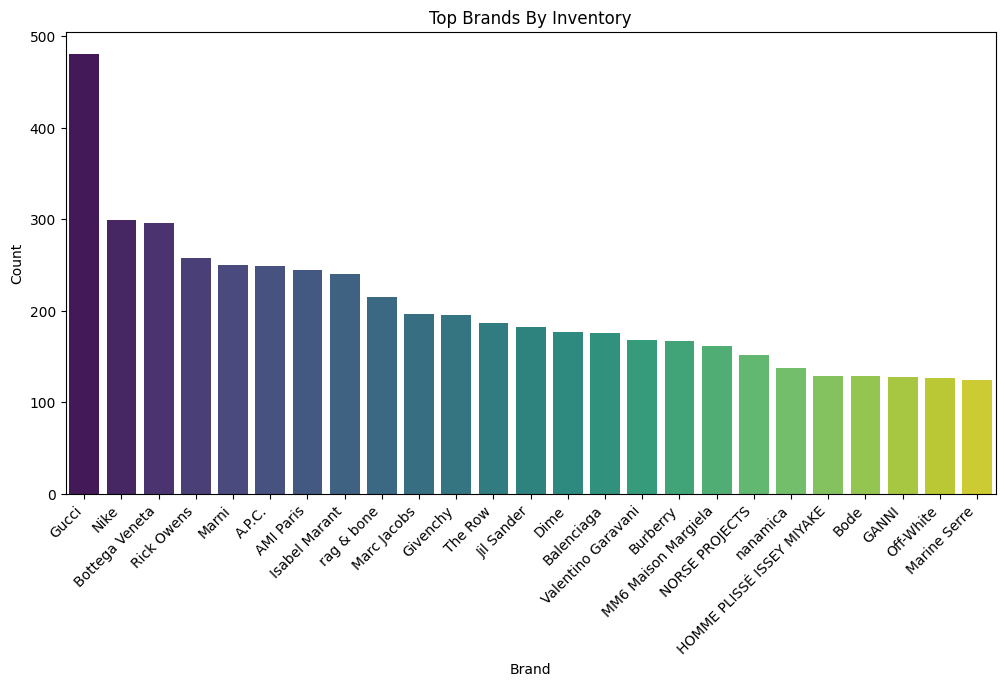

In [5]:
#TOP 25 BRANDS ON SSENSE BY ITEMS In Inventory

popular_brands = df['brand'].value_counts().head(25)
print("Top  Brands By Inventory:")
print(popular_brands)

plt.figure(figsize=(12, 6))
sns.barplot(x=popular_brands.index, y=popular_brands.values, palette="viridis")
plt.title('Top Brands By Inventory')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


Product Types:
mens      11771
womens     8148
Name: type, dtype: int64


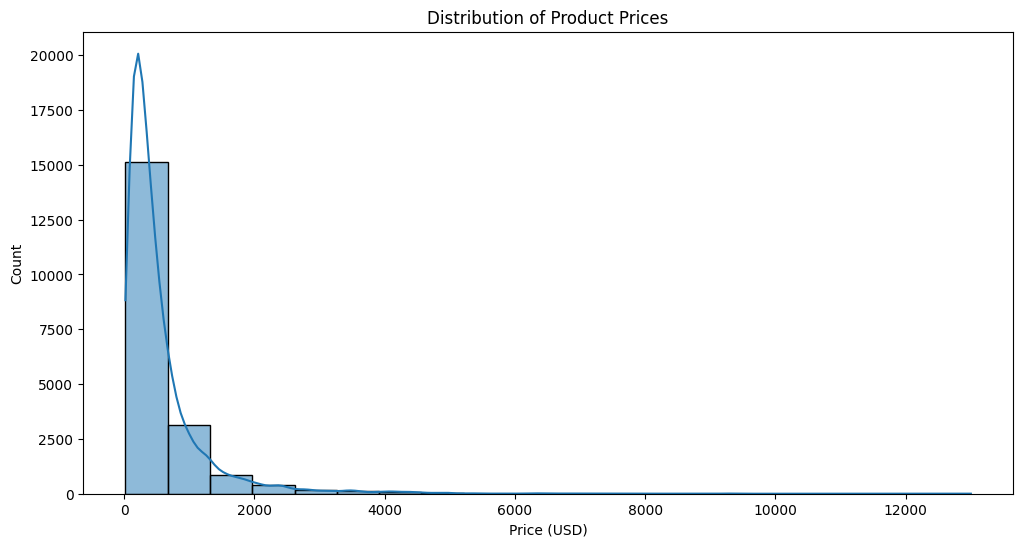

In [6]:
#Creating a distribution of item prices

# Explore product types
product_types = df['type'].value_counts()
print("\nProduct Types:")
print(product_types)

# Data visualization

# Visualize pricing distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['price_usd'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')

plt.show()




/var/folders/tc/w0kp88z15y7ghkgd9_vdxk140000gn/T/ipykernel_57629/2421905660.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette="viridis")


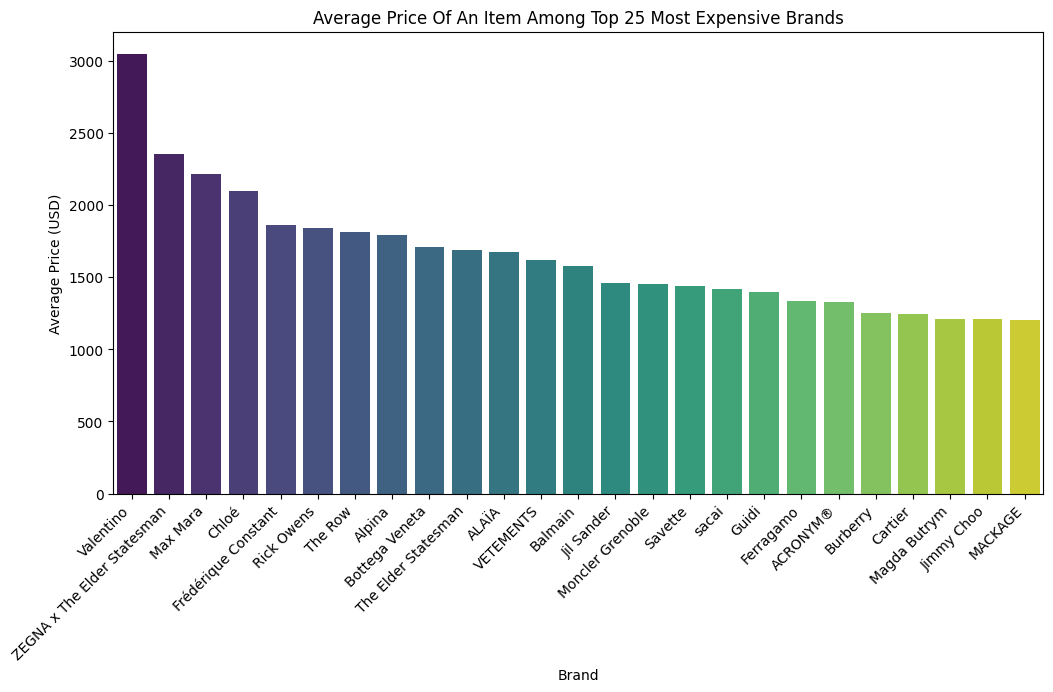

In [9]:
#BRAND SEGMENTATION BY AVG PRICE

# created a minimum item threshold for brands to be included in the viz

min_item_count = 5
top_n_brands = 25  # Number of top brands to display

# Filtering brands out that have less than 5 items on ssense

brand_counts = df['brand'].value_counts()
selected_brands = brand_counts[brand_counts >= min_item_count].index

# filtering our dataframe
df_filtered = df[df['brand'].isin(selected_brands)]

# Calculating the average prices for selected brands
brand_avg_price = df_filtered.groupby('brand')['price_usd'].mean().sort_values(ascending=False).head(top_n_brands)

# Visualize top 20 average prices
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette="viridis")
plt.title(f'Average Price Of An Item Among Top 25 Most Expensive Brands')
plt.xlabel('Brand')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


/var/folders/tc/w0kp88z15y7ghkgd9_vdxk140000gn/T/ipykernel_57629/154977472.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_jackets_top_brands.index, y=avg_price_jackets_top_brands.values, palette="viridis")


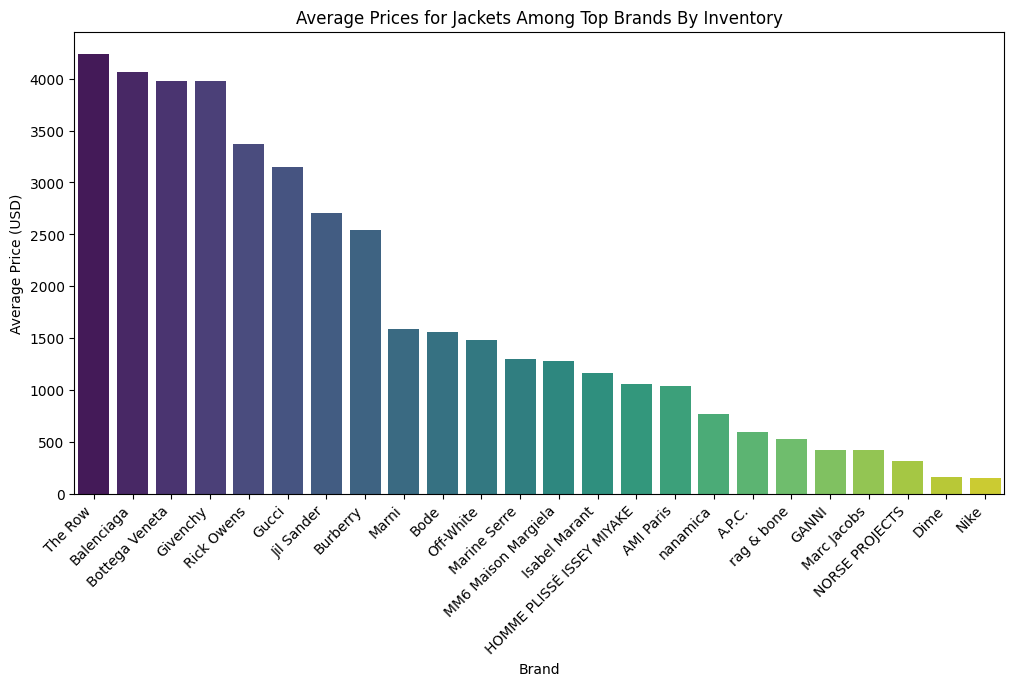

In [11]:
#LOOKING AT THE AVERAGE PRICE OF JACKETS AMONGST TOP 20 BRANDS

# creating key words to search for jackets

jacket_keywords = ['Jacket', 'Coat', 'Parka', 'Bomber']

# Creating a new column in the data frame for items that match keywords

df['IsJacket'] = df['description'].str.contains('|'.join(jacket_keywords), case=False)

# Filtering rows with Jackets

df_jackets = df[df['IsJacket']] 

# Here is our popular_brands object created earlier

popular_brands = df['brand'].value_counts().head(25).index

# Filtering rows with jackets amongst the top 20

df_top_brands_jackets = df_jackets[df_jackets['brand'].isin(popular_brands)]
# Calculating the average price of those jackets

avg_price_jackets_top_brands = df_top_brands_jackets.groupby('brand')['price_usd'].mean().sort_values(ascending=False)


# Visualize average prices for jackets among the top 20 popular brands
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_jackets_top_brands.index, y=avg_price_jackets_top_brands.values, palette="viridis")
plt.title('Average Prices for Jackets Among Top Brands By Inventory')
plt.xlabel('Brand')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

